In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
Customer_Churn = pd.read_csv(r"D:\Bank_Churn_Project\data\Customer-Churn-Records.csv")

## Visualization

### Target variable distribution

Exited
0    7962
1    2038
Name: count, dtype: int64


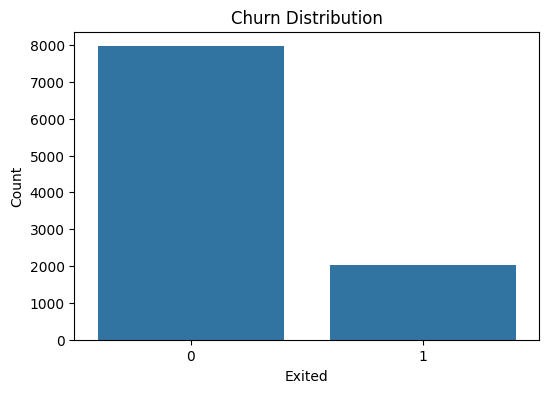

In [3]:
print(Customer_Churn['Exited'].value_counts())
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=Customer_Churn)
plt.title('Churn Distribution')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.savefig('../plots/churn_distribution.png')
plt.show()

**Observation:**
 Target variable `Exited` shows ~20% of customers churned, 80% stayed.

### Categorical Features vs Target


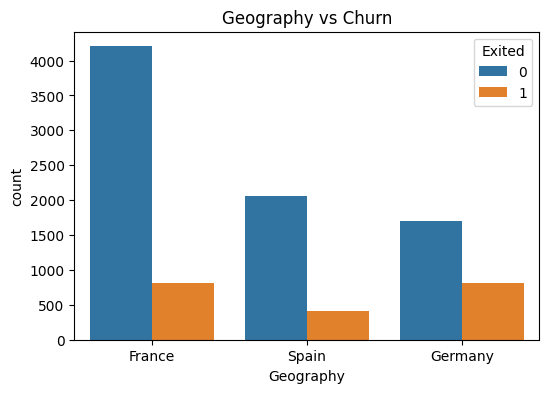

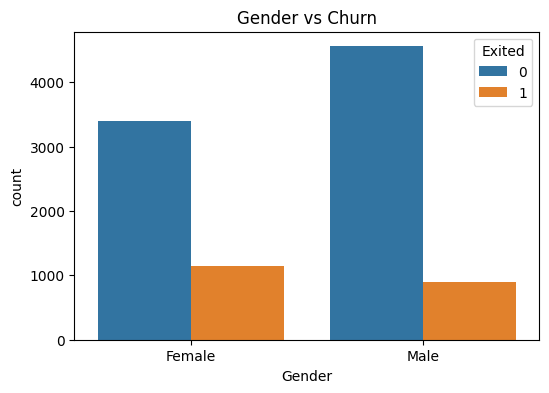

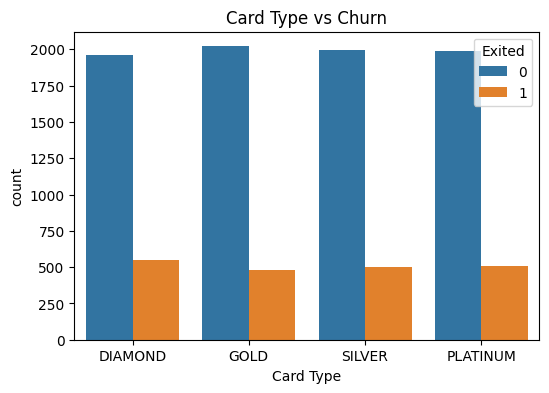

In [5]:
categorical_features = ['Geography', 'Gender', 'Card Type']

for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Exited', data=Customer_Churn)
    plt.title(f'{col} vs Churn')
    plt.savefig(f'../plots/{col.lower().replace(" ","_")}_vs_churn.png')
    plt.show()

### Insights – Categorical Features vs Churn

- **Germany** shows higher churn → consider regional retention strategies.
- **Female** customers churn slightly more → explore gender-based engagement.
- **Card Type** has minimal churn impact → not a strong predictor.

### Numerical Features vs Target

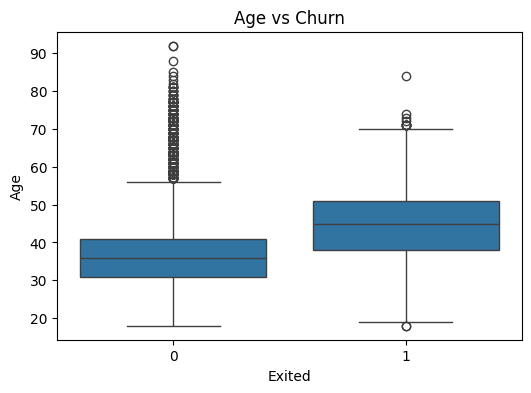

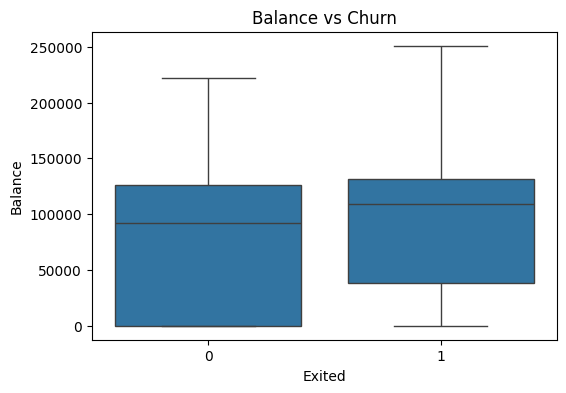

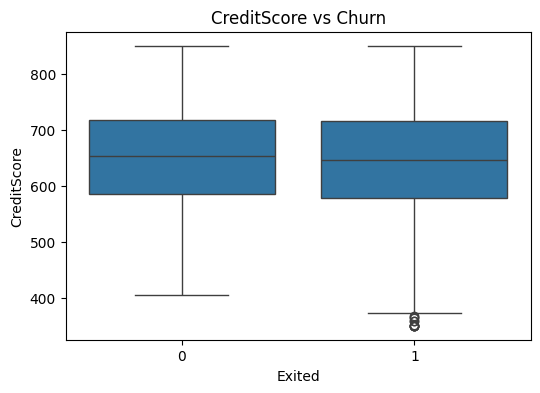

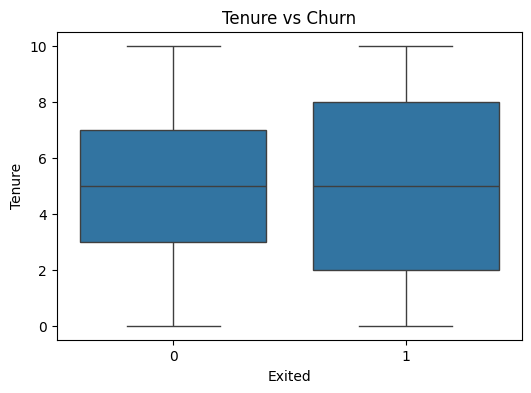

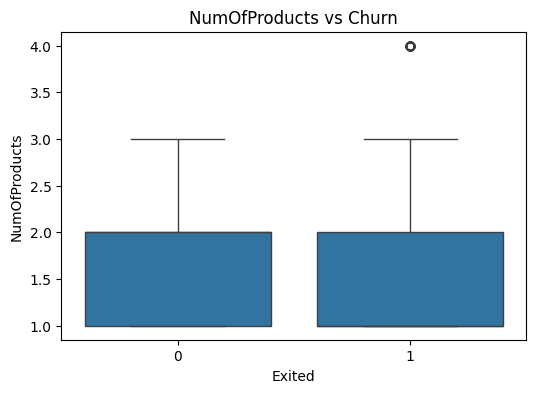

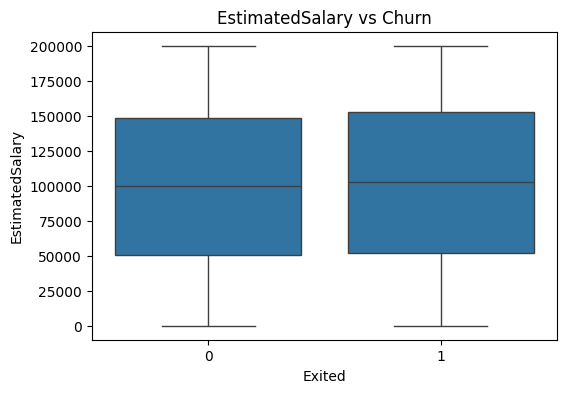

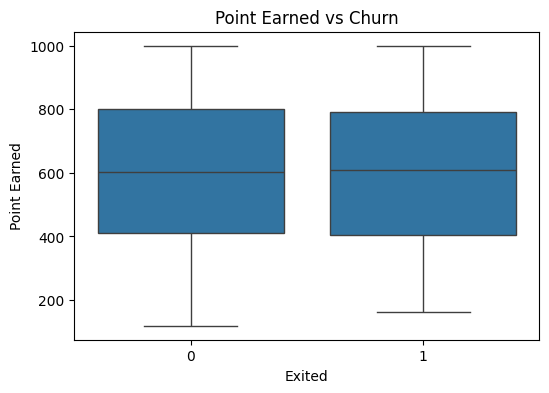

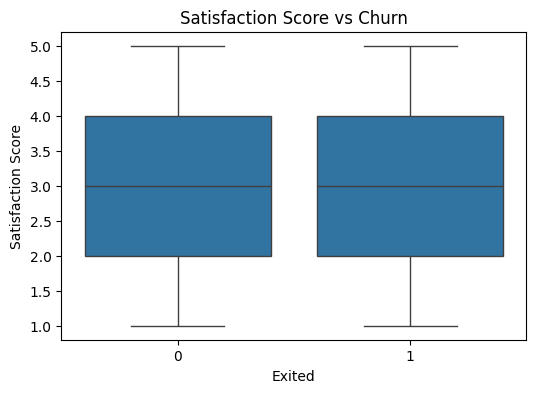

In [6]:
numerical_features = ['Age', 'Balance', 'CreditScore', 'Tenure', 
                      'NumOfProducts', 'EstimatedSalary', 'Point Earned', 'Satisfaction Score']

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Exited', y=col, data=Customer_Churn)
    plt.title(f'{col} vs Churn')
    plt.savefig(f'../plots/{col.lower().replace(" ","_")}_vs_churn_boxplot.png')
    plt.show()

### Insights: Numerical Features vs Churn

- **Age vs Churn**  
  Customers who churn (Exited = 1) tend to be older.  
  Median age of churners is ~45+, while non-churners are younger (~35).  
  Older customers may be more likely to leave, possibly due to shifting financial needs or expectations.  

- **Balance vs Churn**  
  Churners show slightly higher median balances.  
  Non-churners include many with zero balance who still stay.  
  High-balance customers may expect premium service and exit if dissatisfied.  

- **Credit Score vs Churn**  
  Credit scores overlap heavily across both groups (600–700 range).  
  No strong separation—suggests limited predictive power in isolation.  
  May still add value when combined with other behavioral features.  

- **Tenure vs Churn**  
  Median tenure is similar (~6 years) for both churners and non-churners.  
  Tenure alone doesn’t explain churn—needs interaction with satisfaction or complaints.  

- **NumOfProducts vs Churn**  
  Most customers hold 1–2 products regardless of churn status.  
  Outliers with 4 products appear among churners—may indicate product fatigue or mismatch.  

- **Estimated Salary vs Churn**  
  Salary distributions are nearly identical across both groups.  
  Estimated salary does not show strong correlation with churn.  

- **Point Earned vs Churn**  
  Both groups have similar point distributions (median ~600).  
  Loyalty points alone don’t differentiate churn behavior.  

- **Satisfaction Score vs Churn**  
  Churners tend to have slightly lower satisfaction scores.  
  Supports the idea that dissatisfaction is a soft churn signal and should be prioritized in retention strategies.



### Numerical Feature Distributions (Histograms)

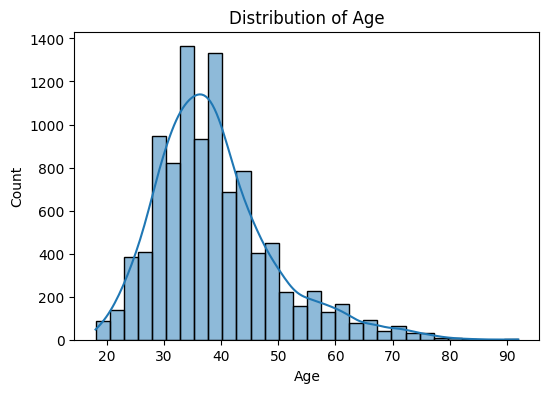

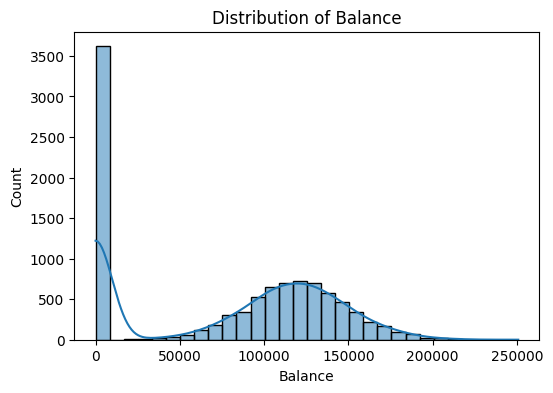

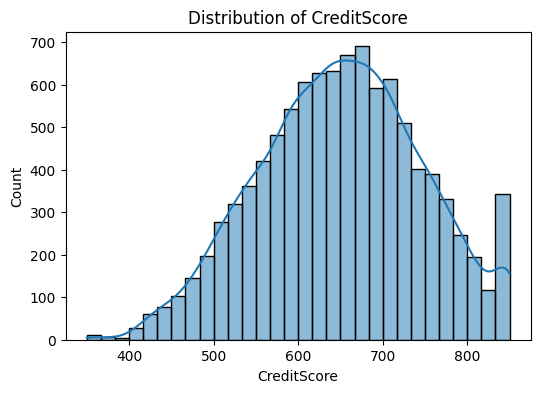

In [7]:
numerical_features = ['Age', 'Balance', 'CreditScore']

for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(Customer_Churn[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.savefig(f'../plots/hist_{col.lower().replace(" ","_")}.png')
    plt.show()

## Insights: Distribution of Numerical Features

### 🔹 Age
- Right-skewed distribution; most customers are aged between 30–40.  
- Very few older customers → younger customer base overall.  

### 🔹 Balance
- Bimodal distribution: large spike at **zero balance** and another around **120K**.  
- Many customers maintain zero balance → possibly inactive accounts or savings behavior.   

## Feature Relationships

### Correlation Heatmap

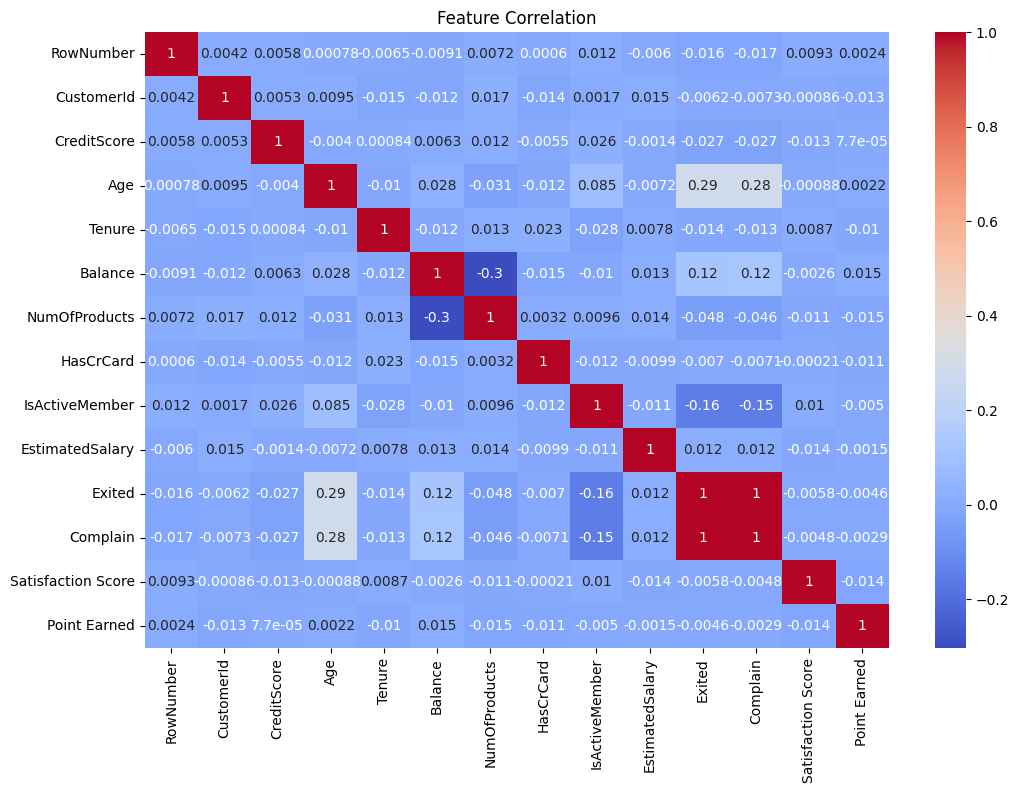

In [9]:
numeric_customer_churn = Customer_Churn.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_customer_churn.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.savefig('../plots/correlation_heatmap.png')
plt.show()

- Most features have weak correlations with each other and with churn.
- Age shows the strongest link to customer churn and complaints.
- Active members are less likely to churn or complain.
- No multicollinearity problem among features.

In [13]:
# Save cleaned dataset
cleaned_path = "../data/cleaned_data.csv"
Customer_Churn.to_csv(cleaned_path, index=False)
print(f"Clean dataset saved to {cleaned_path}")

Clean dataset saved to ../data/cleaned_data.csv
